# PySPEDAS/PyTplot for Solar Physicists

**By Eric Grimes, UCLA - Earth, Planetary, and Space Sciences; egrimes@igpp.ucla.edu**

- PySPEDAS: https://pyspedas.readthedocs.io/
- PyTplot: https://pytplot.readthedocs.io/


This notebook is available online at:

https://colab.research.google.com/drive/1OOobvI53Qgb6HszUc1pFsF9BmLYQGVN7?usp=sharing


A little history: 
- `tplot` started as an IDL project in 1995, by Davin Larson, and is the core of SPEDAS (and now PySPEDAS)
- in 2017, some developers on the MAVEN team created an initial Python version, using Qt as a back-end for creating figures
- in late 2021, development began on a `matplotlib` version, which is what we're using in this notebook
- it has primarily been used in Magnetospheric Physics, but I'm sure it's also going to be useful for timeseries data in other areas of Heliophysics

In [2]:
import pyspedas
from pytplot import tplot

### Setting your local data directory

By default, data files are saved in a subfolder of your current working directory; you can change this by setting the `SPEDAS_DATA_DIR` environment variable. Directories for individual missions can also be changed from the default with mission-specific environment variables, e.g., `PSP_DATA_DIR` or `SOLO_DATA_DIR`

### Load some Parker Solar Probe FIELDS data

#### Set a timespan for four days near perihelion 2

This example time range was taken from the PSP FIELDS team's IDL example

In [3]:
trange = ['2019-04-03', '2019-04-07']

### Load the MAG data in RTN coordinates

Note: the load routines in PySPEDAS all follow the form: pyspedas.mission.instrument(), and have the same core keywords for accessing data (trange, level, datatype, etc). 

In [4]:
variables = pyspedas.psp.fields(datatype='mag_rtn_4_sa_per_cyc', trange=trange)

19-Feb-24 23:02:26: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/
19-Feb-24 23:02:27: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf to psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf
19-Feb-24 23:02:33: Download complete: psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf
19-Feb-24 23:02:34: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190404_v02.cdf to psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190404_v02.cdf
19-Feb-24 23:02:40: Download complete: psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190404_v02.cdf
19-Feb-24 23:02:40: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/psp

To find the supported load routines and keywords, see our documentation: https://pyspedas.readthedocs.io/

You can also see the supported options by calling `help` on the load routine you're interested in

In [5]:
help(pyspedas.solo.mag)

Help on function mag in module pyspedas.solo:

mag(trange=['2020-06-01', '2020-06-02'], datatype='rtn-normal', level='l2', suffix='', get_support_data=False, varformat=None, varnames=[], downloadonly=False, notplot=False, no_update=False, time_clip=False)
    This function loads data from the Magnetometer (MAG)
    
    Parameters
    ----------
        trange : list of str
            time range of interest [starttime, endtime] with the format 
            'YYYY-MM-DD','YYYY-MM-DD'] or to specify more or less than a day 
            ['YYYY-MM-DD/hh:mm:ss','YYYY-MM-DD/hh:mm:ss']
    
        datatype: str
            Data type; Valid options:
              'rtn-normal': RTN Coordinates in Normal Mode
              'rtn-normal-1-minute': Same as above, but at 1-min resolution
              'rtn-burst': RTN Coordinates in Burst Mode
              'srf-normal': Spacecraft Reference Frame in Normal Mode
              'srf-burst': Spacecraft Reference Frame in Burst Mode 
    
        level

Note: most load routines have some reasonable defaults for every keyword (including trange), so simply calling `pyspedas.mission.instrument()` should load some data, e.g., 

In [6]:
pyspedas.solo.mag()

19-Feb-24 23:02:57: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/mag/science/l2/rtn-normal/2020/
19-Feb-24 23:02:57: Downloading https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/mag/science/l2/rtn-normal/2020/solo_l2_mag-rtn-normal_20200601_v03.cdf to solar_orbiter_data/mag/science/l2/rtn-normal/2020/solo_l2_mag-rtn-normal_20200601_v03.cdf
19-Feb-24 23:03:08: Download complete: solar_orbiter_data/mag/science/l2/rtn-normal/2020/solo_l2_mag-rtn-normal_20200601_v03.cdf


['B_RTN']

And we can now plot it:

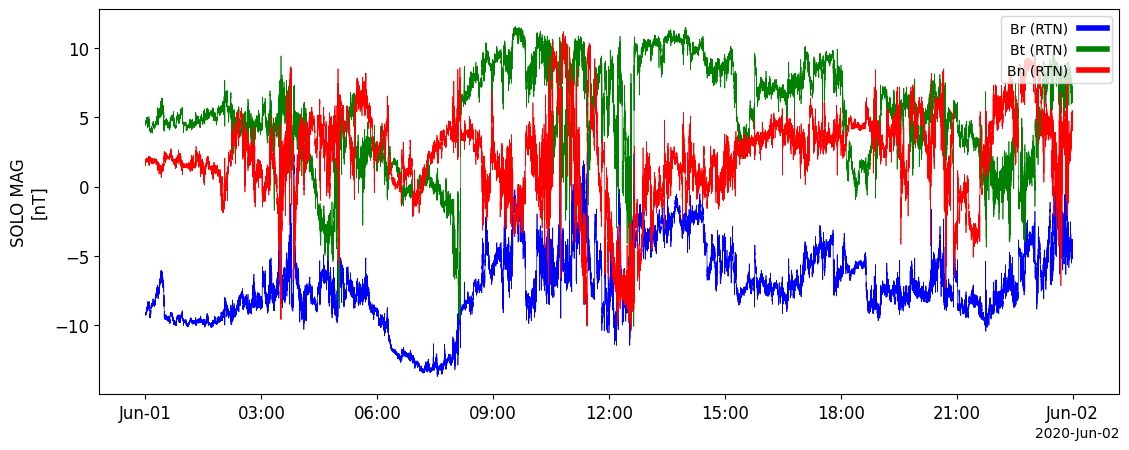

In [7]:
tplot('B_RTN')

### PSP Radio Frequency Spectrometer (RFS) HFR and LFR data

Note: specifying the variable names with the varnames keyword isn't required, but does speed up loading these data

In [8]:
pyspedas.psp.fields(datatype='rfs_hfr', trange=trange, varnames='psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2')
pyspedas.psp.fields(datatype='rfs_lfr', trange=trange, varnames='psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2')

19-Feb-24 23:03:09: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_hfr/2019/
19-Feb-24 23:03:10: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190403_v03.cdf to psp_data/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190403_v03.cdf
19-Feb-24 23:03:26: Download complete: psp_data/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190403_v03.cdf
19-Feb-24 23:03:26: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190404_v03.cdf to psp_data/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190404_v03.cdf
19-Feb-24 23:03:43: Download complete: psp_data/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190404_v03.cdf
19-Feb-24 23:03:43: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190405_v03.cdf to psp_data/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190405_v03.cdf
19-Feb-24 23:03:58: Download complete: psp_data/fields/l2/rfs_hfr/2019

['psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2', 'psp_fld_l2_quality_flags']

You can use the `xsize` and `ysize` options to change the figure size

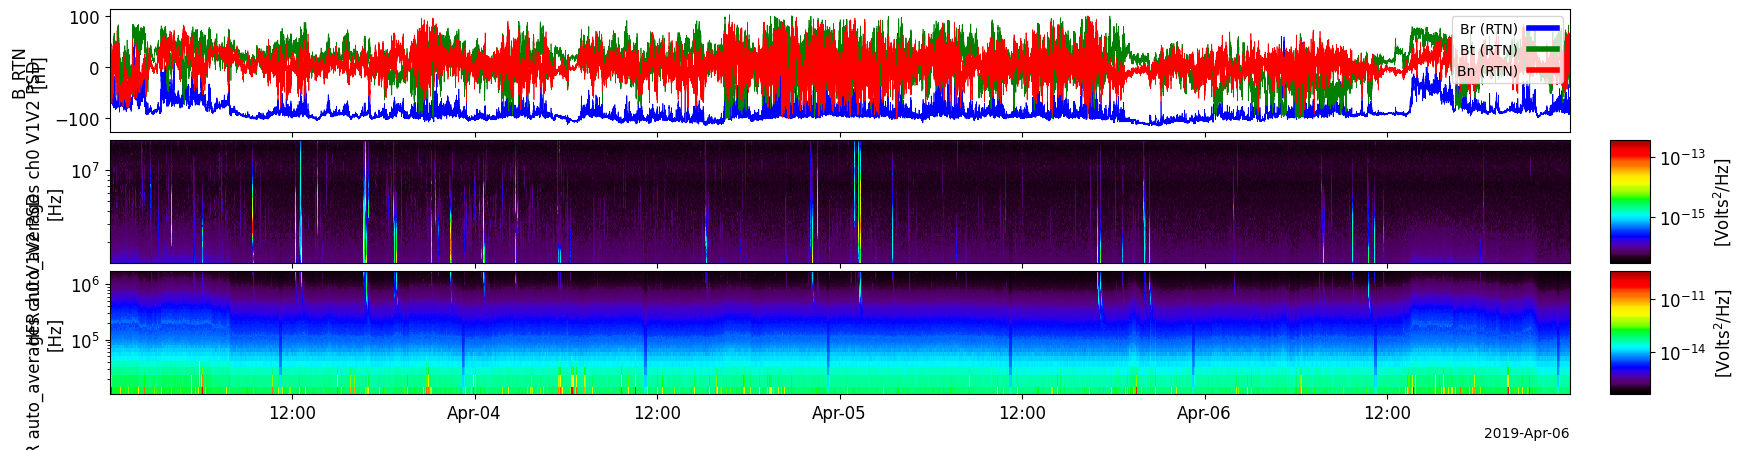

In [9]:
tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc',
       'psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2',
       'psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2'], xsize=20)

Return the data in `numpy` arrays

In [10]:
from pytplot import get_data

data = get_data('psp_fld_l2_mag_RTN_4_Sa_per_Cyc')

The time values are stored in `data.times` (as unix times)

In [11]:
data.times

array([1.5542496e+09, 1.5542496e+09, 1.5542496e+09, ..., 1.5545952e+09,
       1.5545952e+09, 1.5545952e+09])

The data values (for a simple line plot) are stored in `data.y`

In [12]:
data.y

array([[-68.48057  ,  24.101665 ,  -2.508148 ],
       [-68.432144 ,  24.598341 ,  -1.9882753],
       [-68.27809  ,  25.49397  ,  -1.8627083],
       ...,
       [-85.62291  ,  -6.7592106,  30.901932 ],
       [-84.878944 ,  -7.3238993,  32.606995 ],
       [-85.198906 ,  -3.1285264,  32.59051  ]], dtype=float32)

You can then use the `numpy` `ndarray` methods to work with these data, e.g., to find the shape of the data:

In [13]:
data.y.shape

(1582027, 3)

You can convert from unix times to strings using `time_string`

In [14]:
from pyspedas import time_string

time_string(data.times[0])

'2019-04-03 00:00:00.075774'

And convert back using `time_double`

In [15]:
from pyspedas import time_double

time_double('2019-04-03 00:00:00.075775')

1554249600.075775

And convert to datetime objects using `time_datetime`

In [16]:
from pyspedas import time_datetime

time_datetime(data.times[0])

datetime.datetime(2019, 4, 3, 0, 0, 0, 75774, tzinfo=datetime.timezone.utc)

For spectra variables, `data.y` contains the data values (z-axis), and  `data.v` contains the y-axis values at each point

In [17]:
rfs_data = get_data('psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2')

In [18]:
rfs_data.y

array([[1.4241522e-16, 1.2002528e-16, 1.1531492e-16, ..., 4.1675483e-17,
        5.2248089e-17, 5.5130728e-17],
       [1.3988928e-16, 1.3030286e-16, 1.1411372e-16, ..., 3.7384977e-17,
        4.7942641e-17, 6.0811354e-17],
       [1.2689870e-16, 1.4484774e-16, 1.1981941e-16, ..., 4.8320540e-17,
        5.1633024e-17, 6.9066663e-17],
       ...,
       [6.9643929e-17, 7.2604177e-17, 7.0270032e-17, ..., 3.7698915e-17,
        4.9464114e-17, 6.5470293e-17],
       [7.3432846e-17, 7.4527471e-17, 7.4414161e-17, ..., 4.8399026e-17,
        5.2863154e-17, 6.1260904e-17],
       [7.5297239e-17, 7.1101607e-17, 6.3363147e-17, ..., 4.1884777e-17,
        4.8169242e-17, 6.2078257e-17]], dtype=float32)

In [19]:
rfs_data.y.shape

(49436, 64)

In [20]:
rfs_data.v

array([[ 1275000.,  1321875.,  1378125., ..., 17625000., 18375000.,
        19171876.],
       [ 1275000.,  1321875.,  1378125., ..., 17625000., 18375000.,
        19171876.],
       [ 1275000.,  1321875.,  1378125., ..., 17625000., 18375000.,
        19171876.],
       ...,
       [ 1275000.,  1321875.,  1378125., ..., 17625000., 18375000.,
        19171876.],
       [ 1275000.,  1321875.,  1378125., ..., 17625000., 18375000.,
        19171876.],
       [ 1275000.,  1321875.,  1378125., ..., 17625000., 18375000.,
        19171876.]], dtype=float32)

In [21]:
rfs_data.v.shape

(49436, 64)

The metadata for a variable can be obtained using the `metadata` option in `get_data`

In [22]:
metadata = get_data('psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2', metadata=True)

metadata

{'CDF': {'VATT': {'FIELDNAM': 'psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2',
   'FORMAT': 'E12.2',
   'LABLAXIS': 'HFR auto_averages ch0 V1V2 PSD',
   'VAR_TYPE': 'data',
   'FILLVAL': -1e+31,
   'DEPEND_0': 'epoch_hfr_auto_averages_ch0_V1V2',
   'DEPEND_1': 'frequency_hfr_auto_averages_ch0_V1V2',
   'DISPLAY_TYPE': 'spectrogram',
   'VALIDMIN': 0.0,
   'VALIDMAX': 1e+30,
   'UNITS': 'Volts^2/Hz',
   'SI_conv': '1.0>Volts^2/Hz',
   'CATDESC': 'HFR Auto Spectra, Ch0: V1V2',
   'SCALETYP': 'log'},
  'GATT': {'TITLE': 'PSP FIELDS RFS HFR data',
   'Project': 'PSP',
   'Discipline': ['Solar Physics>Heliospheric Physics',
    'Space Physics>Interplanetary Studies'],
   'Source_name': 'PSP_FLD>Parker Solar Probe FIELDS',
   'Descriptor': 'RFS_HFR>Radio Frequency Spectrometer HFR',
   'Data_type': 'L2>Level 2 Data',
   'Data_version': '03',
   'TEXT': ['PSP FIELDS Radio Frequency Spectrometer (RFS), HFR data.',
    'The RFS is the high frequency component  of the FIELDS experiment on the  Parke

You can create new `tplot` variables using `store_data`

In [23]:
from pytplot import store_data

store_data('mag_rtn', data={'x': data.times, 'y': data.y})

True

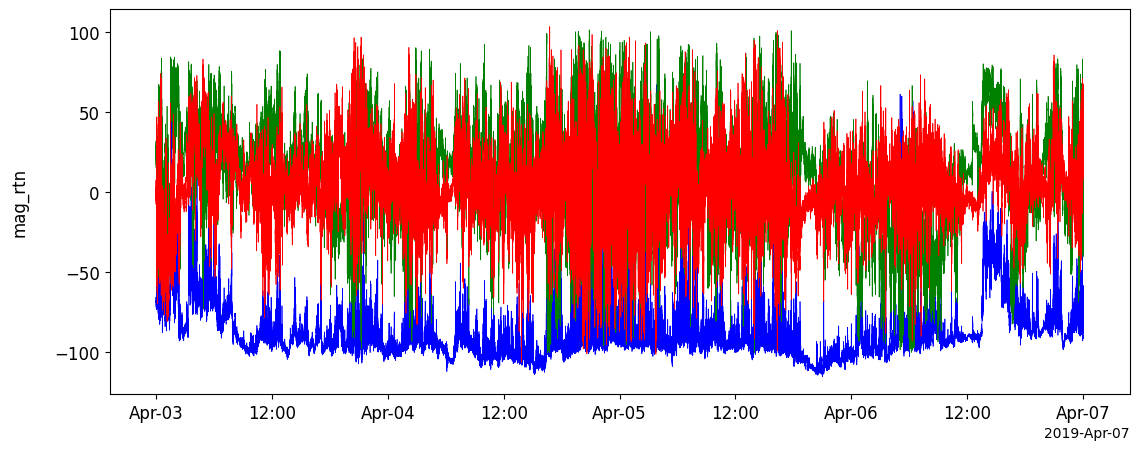

In [24]:
tplot('mag_rtn')

To find the names of all of the loaded `tplot` variables, use `tplot_names`

In [25]:
from pytplot import tplot_names

variables = tplot_names()

0 : psp_fld_l2_mag_RTN_4_Sa_per_Cyc
1 : psp_fld_l2_quality_flags
2 : B_RTN
3 : psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2
4 : psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2
5 : mag_rtn


To change the plot options, use the `options` function in `pytplot`

In [26]:
from pytplot import options

help(options)

Help on function options in module pytplot.options:

options(name, option=None, value=None, opt_dict=None)
    This function allows the user to set a large variety of options for individual plots.
    
    Parameters:
        name : str
            Name or number of the tplot variable
        option : str
            The name of the option.  See section below.
        value : str/int/float/list
            The value of the option.  See section below.
        opt_dict : dict
            This can be a dictionary of option:value pairs.  Option and value
            will not be needed if this dictionary item is supplied.
    
    Options:
        =================== ==========   =====
        Options             Value type   Notes
        =================== ==========   =====
        Color               str/list     red, green, blue, etc.  Also takes in RGB tuples, i.e. (0,255,0) for green
        Colormap            str/list     https://matplotlib.org/examples/color/colormaps_reference.h

For example:

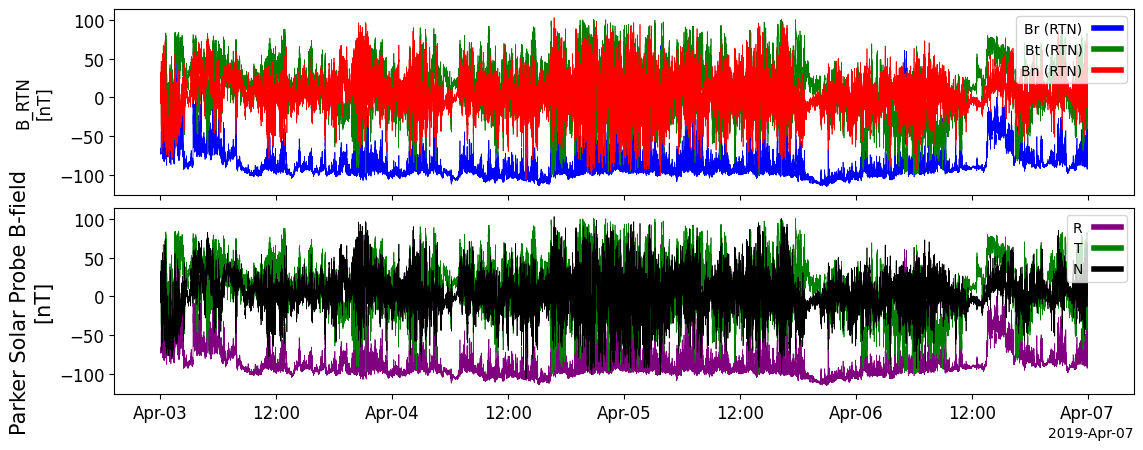

In [27]:
options('mag_rtn', 'color', ['purple', 'green', 'black'])
options('mag_rtn', 'legend_names', ['R', 'T', 'N'])
options('mag_rtn', 'ytitle', 'Parker Solar Probe B-field')
options('mag_rtn', 'ysubtitle', '[nT]')
options('mag_rtn', 'char_size', 15)

tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc', 'mag_rtn'])

Note: `options` changes panel-level options, figure-level options can be set with `tplot_options`, e.g., 


Note: not all of these options are supported by the `matplotlib` version yet; if you find one that isn't working, please let us know and we'll prioritize it


In [28]:
from pytplot import tplot_options

help(tplot_options)

Help on function tplot_options in module pytplot.tplot_options:

tplot_options(option, value)
    This function allows the user to set GLOBAL options for the generated plots.
    
    Parameters:
        option : str
            The name of the option.  See section below  
        value : str/int/float/list
            The value of the option.  See section below.  
            
    Options:
        ================  ==========   =====
        Options           Value type   Notes
        ================  ==========   =====
        title             str          Title of the the entire output
        title_size        int          Font size of the output
        wsize             [int, int]   [height, width], pixel size of the plot window
        title_align       int          Offset position in pixels of the title
        var_label         srt          Name of the tplot variable to be used as another x axis
        alt_range         [flt, flt]   The min and max altitude to be plotted o

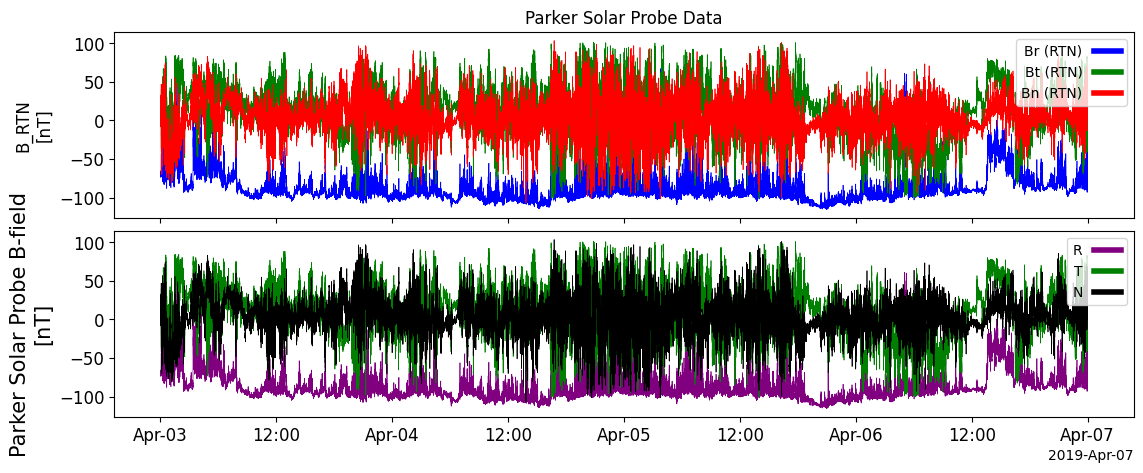

In [29]:
tplot_options('title', 'Parker Solar Probe Data')

tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc', 'mag_rtn'])

You can save figures using keywords to `tplot`, e.g., to save a PNG file:

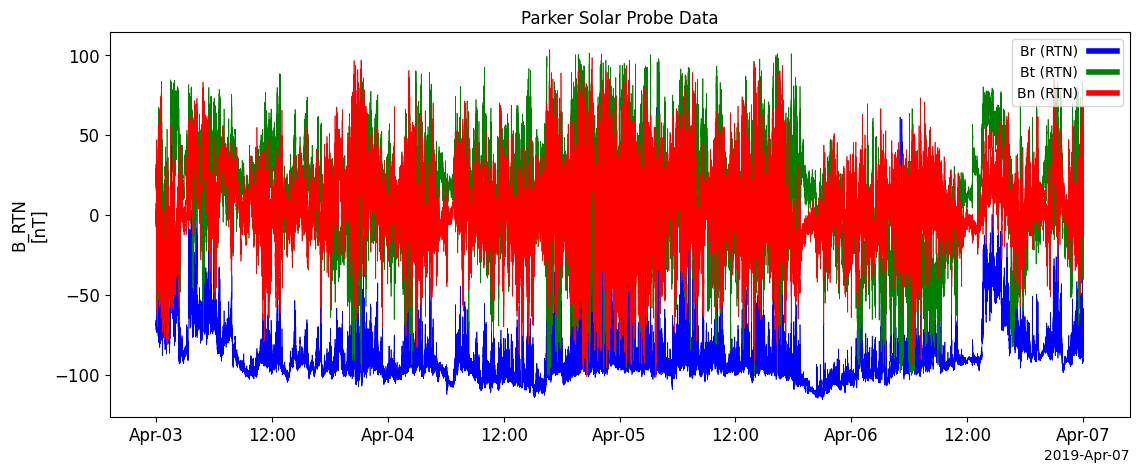

In [30]:
tplot('psp_fld_l2_mag_RTN_4_Sa_per_Cyc', save_png='figure')

To save the figure as a postscript file:

19-Feb-24 23:06:18: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


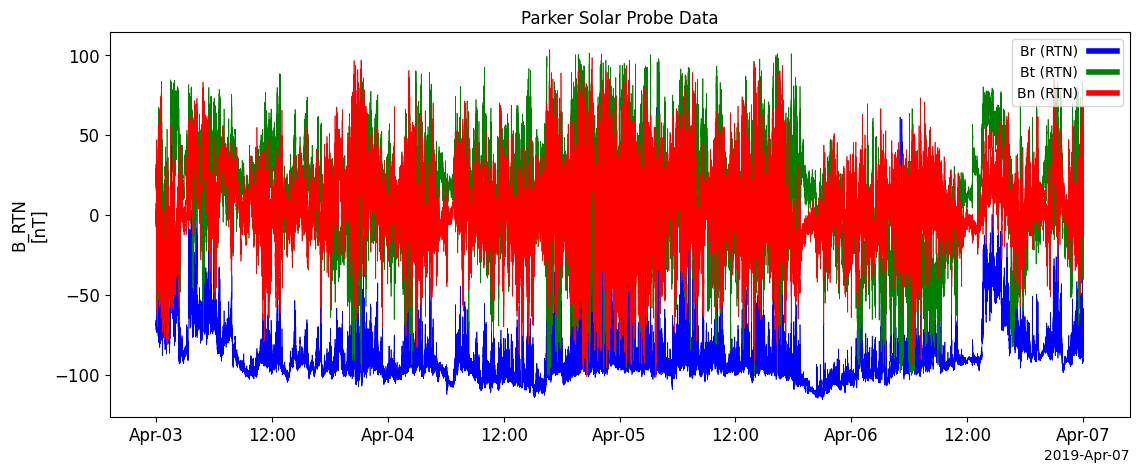

In [31]:
tplot('psp_fld_l2_mag_RTN_4_Sa_per_Cyc', save_eps='figure')

Or save as a PDF:

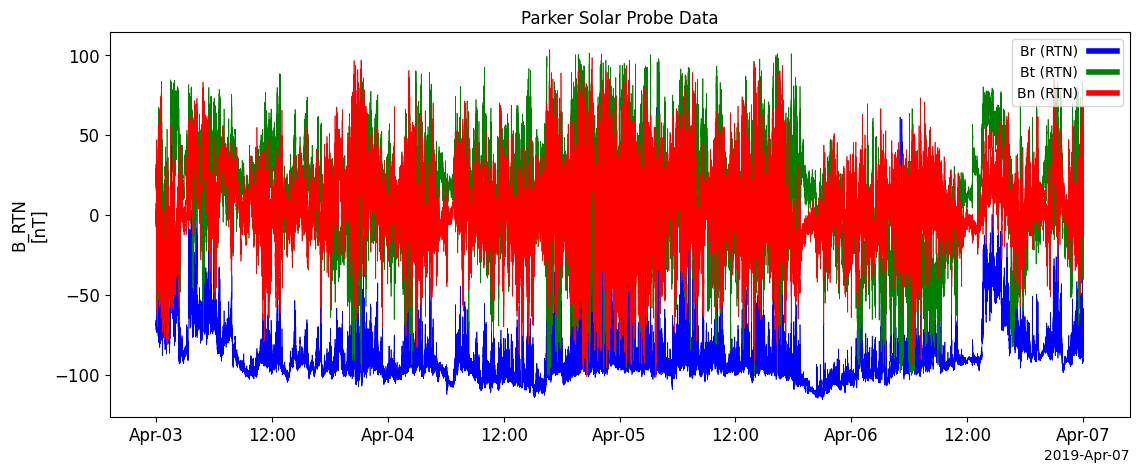

In [32]:
tplot('psp_fld_l2_mag_RTN_4_Sa_per_Cyc', save_pdf='figure')

Note: you can have full control over the figures and axes by returning the objects using the `return_plot_objects` keyword, e.g., 

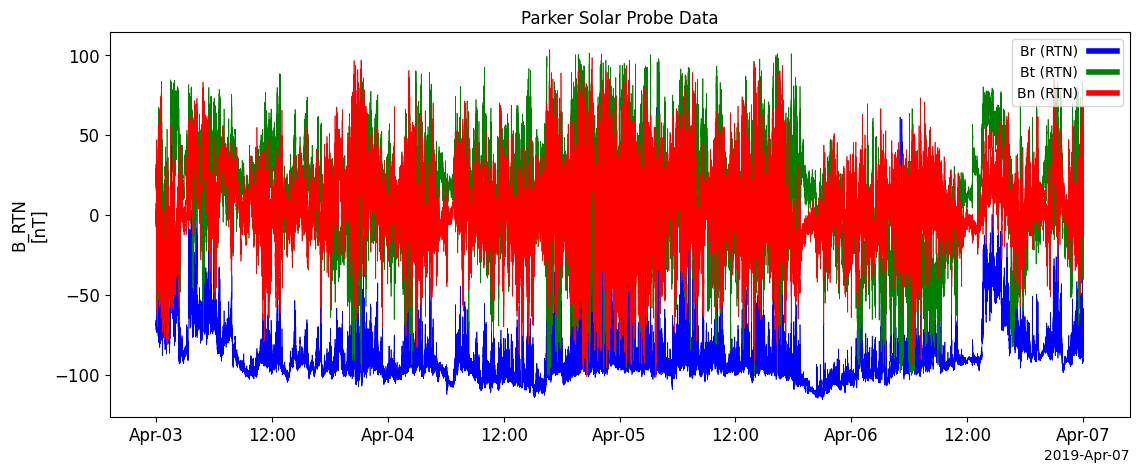

In [33]:
fig, axes = tplot('psp_fld_l2_mag_RTN_4_Sa_per_Cyc', return_plot_objects=True)

In [34]:
axes

<Axes: title={'center': 'Parker Solar Probe Data'}, ylabel='B_RTN\n[nT]'>

For example, to add some text to a figure:

In [35]:
from datetime import datetime, timezone
import matplotlib

time = matplotlib.dates.date2num(datetime(2019, 4, 6, 13, 0, 0, tzinfo=timezone.utc))
axes.annotate('Your text', (time, -110), fontsize='x-large')

Text(17992.541666666668, -110, 'Your text')

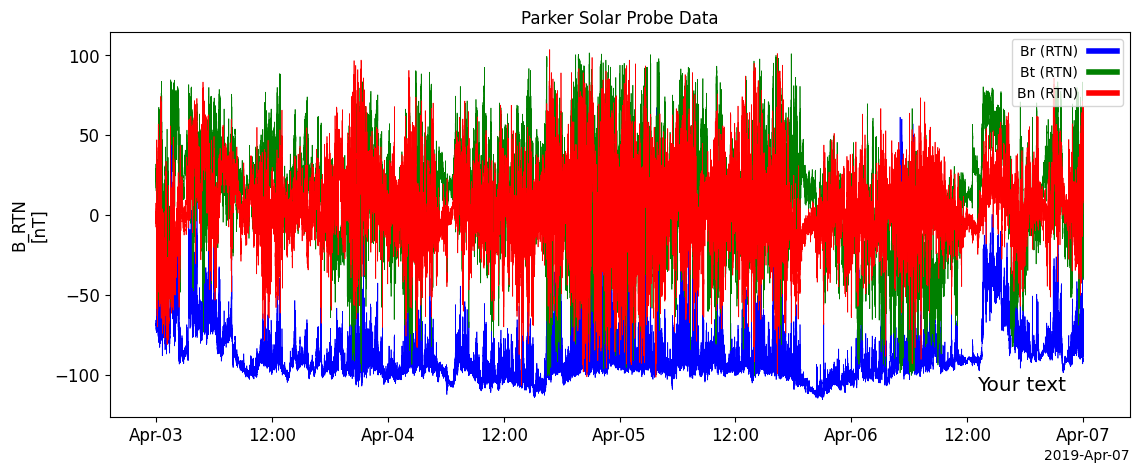

In [36]:
fig